In [1]:
%matplotlib inline

In [23]:
from IPython.display import SVG, display

import matplotlib.pyplot as plt
import numpy as np

# Untitled

**PHYS 395 project 2; **
**Matt Wiens - #301294492**

## Notebook setup 

The first command here sets the default figure size to be a bit larger than normal. The second command sets it so all figure output areas are expanded by default.

In [3]:
# Set default plot size
plt.rcParams["figure.figsize"] = (12, 9)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

# Introduction

Write introduction here

# Methods

Write methods here

# Analysis

## Illustrating fractal behaviour

**ignore**

To get a start at understanding how randomness can generate fractals, we'll look at a few examples.

### The Sierpiński triangle

**ignore**

Here we'll consider how we can randomly generate the Sierpiński triangle. Classically, you can generate this object by starting with any equilateral triangle and subdividing this triangle it into four smaller equilateral triangles of the same size (this subdivision is unique). After removing the "central" triangle, apply a similar subdivision to each of the remaining triangles, and repeat this process ad infinitum. Wikipedia has a good illustration of the end result [here][siepgen]).

Surprisingly, we can also approximate this triangle 
 
[siepgen]: https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle#Removing_triangles

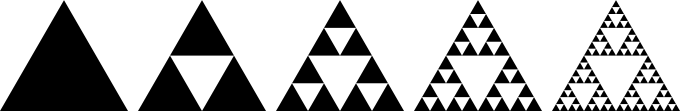

In [25]:
svg_url = "https://upload.wikimedia.org/wikipedia/commons/0/05/Sierpinski_triangle_evolution.svg"
display(SVG(url=svg_url))

In [93]:
# Vertices of the equilateral triangle
vertices = np.array([[0, 0], [0.5, 1], [1, 0]])

# Pick a random point within the triangle to start
s, t = np.sort(np.random.random(2))
init_point = np.array(
    [
        s * vertices[0, 0] + (t - s) * vertices[1, 0] + (1 - t) * vertices[2, 0],
        s * vertices[0, 1] + (t - s) * vertices[1, 1] + (1 - t) * vertices[2, 1],
    ]
)

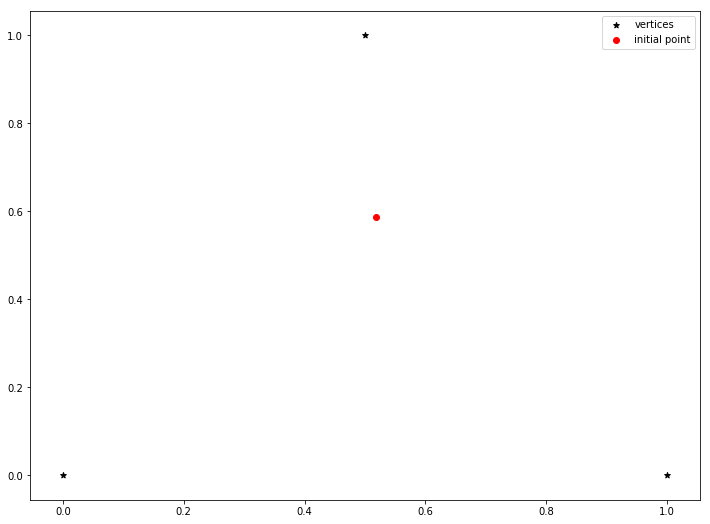

In [94]:
# Plot the initial point and the vertices
_, ax = plt.subplots()

ax.scatter(*zip(*vertices), c="k", marker="*")
ax.scatter(*init_point, c="r", marker="o")

ax.legend(["vertices", "initial point"]);

In [95]:
# Set up an array with all the points we'll compute
num_points = 25000

points = np.zeros((num_points, 2))
points[0, :] = init_point

In [96]:
# Compute the remaining points
for i in range(1, num_points):
    r = np.random.randint(3)
    
    points[i, :] = 0.5 * (points[i - 1, :] + vertices[r, :])

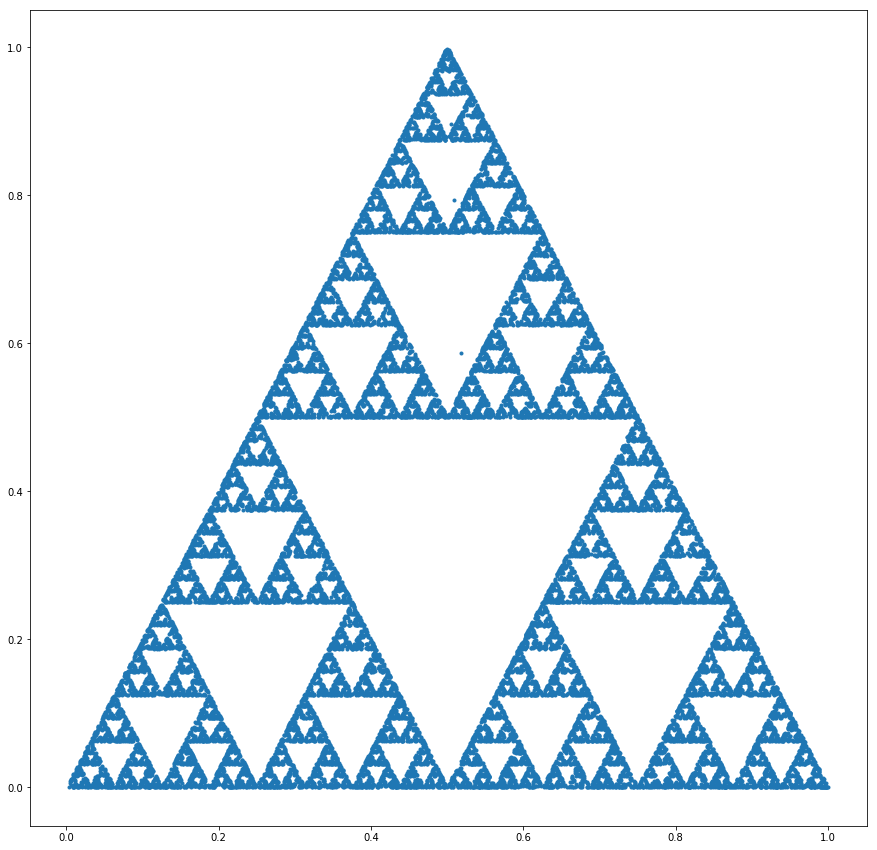

In [97]:
# Plot simulation results
_, ax = plt.subplots(figsize=(15, 15))

ax.scatter(x=points[:, 0], y=points[:, 1], marker=".");

# Discussion

Write discussion here